# Support Vector Machines (SVM)

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [12]:
cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv', index_col=0)
X = cleaned_dataset.drop('outcome', axis=1)
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Hyperparamter Tuning

## Hyperparameters to be tuned
1.	```C```
    - The regularisation (penalty) parameter
    - Represents misclassification or error term (how much is tolerated by the model)
    - A large ```C``` will classify all data points correctly which could lead to overfitting
2. ```kernel```
    - Specifies the kernel type to be used in the algorithm
3. ```gamma```
    - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
    - A large gamma will mean nearby points will have high influence; A low gamma means far away points also be considered

In [4]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = {}
scores_list = []
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[kernel] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

In [8]:
px.bar(
    scores_list)

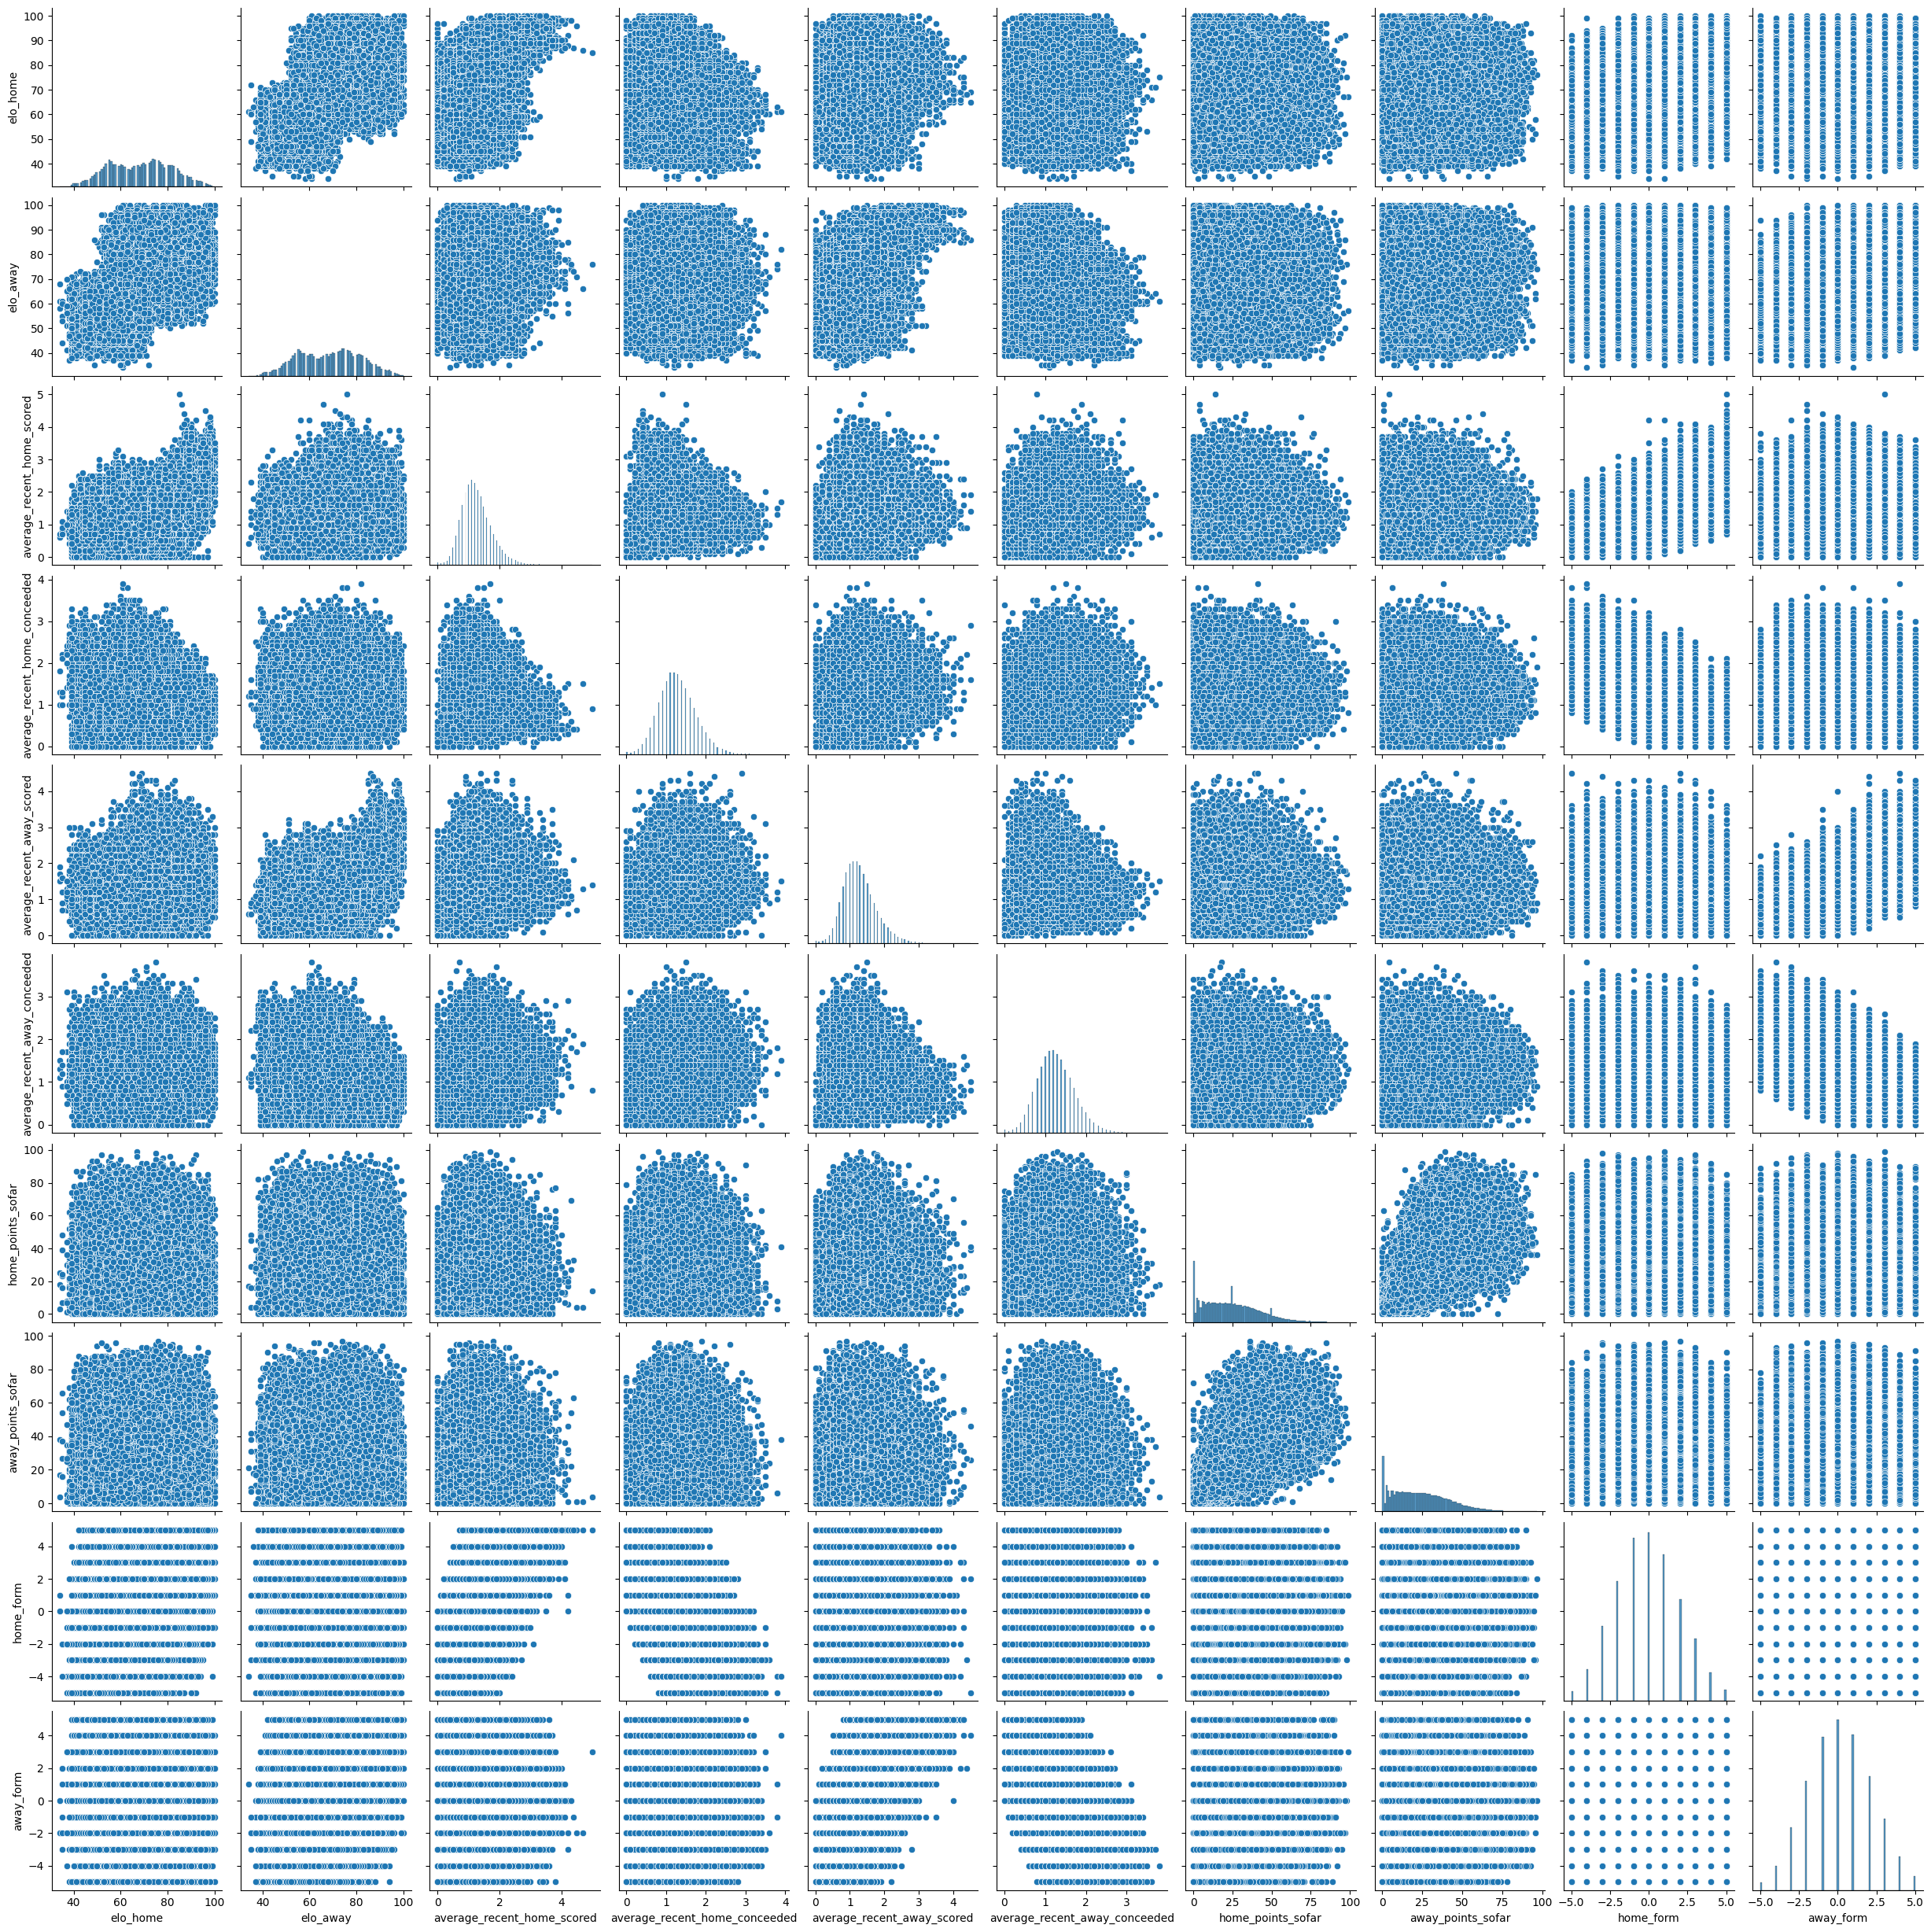

In [13]:
import seaborn as sns
sns.pairplot(X, kind="scatter")